In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv("../data/raw/disgenet_with_gene_id.csv", sep="\t")


df = df[df["geneId"].map(df["geneId"].value_counts()) > 3]
df.value_counts("diseaseId")

(9423,)

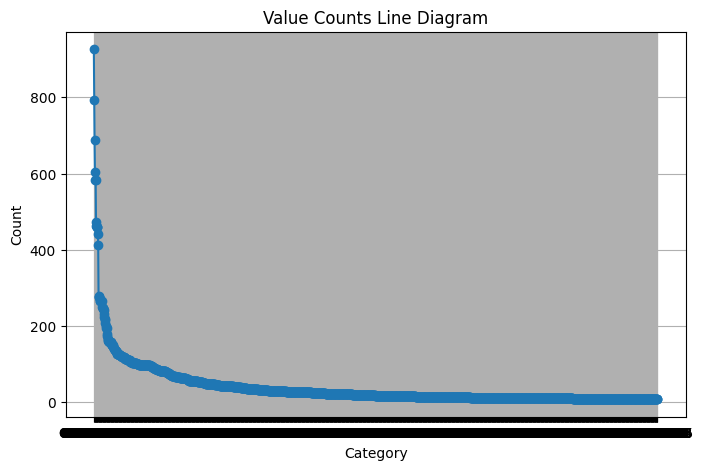

In [7]:
value_counts = df['diseaseId'].value_counts()
# Plot line diagram
plt.figure(figsize=(8, 5))
plt.plot(value_counts.index, value_counts.values, marker='o', linestyle='-')

# Labels and title
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Value Counts Line Diagram")
plt.grid(True)

# Show plot
plt.show()

In [212]:
df = pd.read_csv("D:/gitrepos/gene-disease-gnn/results/basic/best_disease_classifications.csv", sep=",") # new, 0
df_map = pd.read_csv("D:/gitrepos/gene-disease-gnn/results/disease_id_to_idx.csv", sep=",")
df["diff"] = df["x_sum"] - df["y_sum"]
df["disease"] = [ df_map.columns[(df_map.iloc[0] == df.iloc[i].disease_idx)].tolist()[0] for i in range(df.shape[0])]

In [197]:
dfr = df.sort_values("y_sum", ascending=False).head(5)

In [198]:
df_f = df[df["diff"] >= 0]
df_f = df[df['f1'] > 0.1]
dfr = pd.concat([dfr, df_f.sort_values(["diff", "f1", "roc-auc"], ascending=[True, False, False])])

In [199]:
df_p = df[df["diff"] >= 0]
df_p = df[df['precision'] > 0.07]
dfr = pd.concat([dfr, df_p.sort_values(["diff", "precision", "roc-auc"], ascending=[True, False, False])])

In [200]:
df_r = df[df["diff"] >= 0]
df_r = df[df['recal'] > 0.99]
dfr = pd.concat([dfr, df_r.sort_values(["diff", "recal", "roc-auc"], ascending=[True, False, False]).head(10)])

In [201]:
dfr.sort_values(["diff", "recal", "roc-auc"], ascending=[True, False, False]).head(10)

,disease_idx,acc,f1,recal,precision,roc-auc,auprc,cm,x_sum,y_sum,diff,disease
62,62,0.946115,0.020713,0.013889,0.040724,0.499945,0.041027,14933 212 639 9,221,648.0,-427.0,C0006142
1004,1004,0.970430,0.008493,0.004484,0.080000,0.501493,0.028472,15324 23 444 2,25,446.0,-421.0,C1458155
1004,1004,0.970430,0.008493,0.004484,0.080000,0.501493,0.028472,15324 23 444 2,25,446.0,-421.0,C1458155
255,255,0.973406,0.009434,0.004950,0.100000,0.501890,0.025949,15371 18 402 2,20,404.0,-384.0,C0023893
50,50,0.975052,0.034314,0.019886,0.125000,0.508356,0.024331,15392 49 345 7,56,352.0,-296.0,C0005586
716,716,0.965998,0.072539,0.049528,0.135484,0.520405,0.032228,15235 134 403 21,155,424.0,-269.0,C0376358
383,383,0.949661,0.085155,0.067766,0.114551,0.524504,0.039992,14961 286 509 37,323,546.0,-223.0,C0036341
383,383,0.949661,0.085155,0.067766,0.114551,0.524504,0.039992,14961 286 509 37,323,546.0,-223.0,C0036341
968,968,0.981891,0.027211,0.015748,0.100000,0.506716,0.017405,15503 36 250 4,40,254.0,-214.0,C1262760
328,328,0.989489,0.034884,0.018634,0.272727,0.509061,0.015086,15624 8 158 3,11,161.0,-150.0,C0028754


In [202]:
df_a = df[df["diff"] >= 0]
df_a = df[df['roc-auc'] > 0.9]
dfr = pd.concat([dfr, df_a.sort_values(["diff", "roc-auc"], ascending=[True, False])])

In [203]:
df_ap = df[df["diff"] >= 0]
df_ap = df[df['auprc'] > 0.04]
dfr = pd.concat([dfr, df_ap.sort_values(["diff", "auprc", "roc-auc"], ascending=[True, False, False])])

In [214]:
dfr = dfr.drop_duplicates()
dfr.sort_values("disease_idx", ascending=False)

,disease_idx,acc,f1,recal,precision,roc-auc,auprc,cm,x_sum,y_sum,diff,disease
1161,1161,0.988286,0.000000,0.000000,0.000000,0.495429,0.002596,15608 144 41 0,144,41.0,103.0,C4551595
1073,1073,0.993415,0.000000,0.000000,0.000000,0.499904,0.006395,15689 3 101 0,3,101.0,-98.0,C1961112
1064,1064,0.998607,0.000000,0.000000,0.000000,0.499715,0.000823,15771 9 13 0,9,13.0,-4.0,C1956130
1042,1042,0.990059,0.132597,0.857143,0.071856,0.923660,0.061718,15624 155 2 12,167,14.0,153.0,C1838979
1004,1004,0.970430,0.008493,0.004484,0.080000,0.501493,0.028472,15324 23 444 2,25,446.0,-421.0,C1458155
986,986,0.998164,0.000000,0.000000,0.000000,0.500000,0.001836,15764 0 29 0,0,29.0,-29.0,C1333990
959,959,0.733426,0.028163,0.137387,0.015689,0.444028,0.026407,11522 3827 383 61,3888,444.0,3444.0,C1257931
807,807,0.931615,0.049296,0.061538,0.041116,0.509482,0.029568,14685 653 427 28,681,455.0,226.0,C0678222
661,661,0.998417,0.000000,0.000000,0.000000,0.500000,0.001583,15768 0 25 0,0,25.0,-25.0,C0280785
652,652,0.995631,0.054795,0.046512,0.066667,0.522367,0.005697,15722 28 41 2,30,43.0,-13.0,C0278510


In [215]:
import os 

files = [ int(f.split('_')[-1].split('.')[0]) for f in os.listdir("../results/cls_weight/infos")]

dfr_ = dfr[dfr["disease_idx"].isin(files)].sort_values("disease_idx")


In [216]:
files = os.listdir("../results/cls_weight/infos")
f_df = None
for f in files:
    tmp = pd.read_csv(f"../results/cls_weight/infos/{f}", sep=": ", header=None).T
    tmp.columns = tmp.iloc[0]
    tmp = tmp[1:].reset_index(drop=True)
    tmp["disease_idx"] = int(f.split('_')[-1].split('.')[0])
    tmp["roc-auc"] = tmp["auc"]

    if f_df is None:
        f_df = tmp.copy()
    else:
        f_df = pd.concat([f_df, tmp])

C:\Users\Nemes\AppData\Local\Temp\ipykernel_6220\1128641810.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tmp = pd.read_csv(f"../results/cls_weight/infos/{f}", sep=": ", header=None).T
C:\Users\Nemes\AppData\Local\Temp\ipykernel_6220\1128641810.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tmp = pd.read_csv(f"../results/cls_weight/infos/{f}", sep=": ", header=None).T
C:\Users\Nemes\AppData\Local\Temp\ipykernel_6220\1128641810.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are inte

In [217]:
pd.merge(dfr.loc[:, ["disease_idx", "acc", "f1", "recal", "precision", "roc-auc", "auprc", "disease"]], 
         f_df.loc[:, ["disease_idx", "acc", "f1", "recal", "precision", "roc-auc", "auprc"]], on="disease_idx", how="inner", suffixes=["_m", "_s"])

,disease_idx,acc_m,f1_m,recal_m,precision_m,roc-auc_m,auprc_m,disease,acc_s,f1_s,recal_s,precision_s,roc-auc_s,auprc_s
0,62,0.946115,0.020713,0.013889,0.040724,0.499945,0.041027,C0006142,"0.886658646235674,","0.0986908358509567,","0.15123456790123457,","0.07324364723467862,","0.5346796807812545,","0.04590252696695729,"
1,109,0.998607,0.312500,0.416667,0.250000,0.707858,0.104610,C0010308,"0.9881593110871906,","0.06965174129353234,","0.5833333333333334,","0.037037037037037035,","0.7859002386836491,","0.021921534231840484,"
2,192,0.994428,0.000000,0.000000,0.000000,0.499078,0.003736,C0019207,"0.9468751978724751,","0.03005780346820809,","0.22033898305084745,","0.016129032258064516,","0.5849692881442111,","0.006466537399503285,"
3,383,0.949661,0.085155,0.067766,0.114551,0.524504,0.039992,C0036341,"0.8466409168619008,","0.09152288072018004,","0.22344322344322345,","0.057547169811320756,","0.5462005256063104,","0.039705862550650485,"
4,390,0.986513,0.000000,0.000000,0.000000,0.494070,0.001646,C0036920,"0.7459634015069968,","0.005946481665014866,","0.46153846153846156,","0.0029925187032418953,","0.6039854418429925,","0.002267631167078869,"
5,559,0.998924,0.000000,0.000000,0.000000,0.500000,0.001076,C0233750,"0.5428354334198696,","0.0035881865857024567,","0.7647058823529411,","0.001798312353022548,","0.6536511156186613,","0.0016284568028527393,"
6,578,0.994048,0.000000,0.000000,0.000000,0.499555,0.005066,C0236736,"0.7938327106946116,","0.030952380952380953,","0.65,","0.015853658536585366,","0.7222825049322217,","0.012077815426099554,"
7,617,0.998860,0.000000,0.000000,0.000000,0.500000,0.001140,C0265700,"0.9129994301272716,","0.011510791366906475,","0.4444444444444444,","0.0058309037900874635,","0.6789892586723013,","0.003224704716065523,"
8,652,0.995631,0.054795,0.046512,0.066667,0.522367,0.005697,C0278510,"0.9295257392515671,","0.008904719501335707,","0.11627906976744186,","0.004629629629629629,","0.5240125507567368,","0.00294445832449128,"
9,661,0.998417,0.000000,0.000000,0.000000,0.500000,0.001583,C0280785,"0.9121762806306591,","0.004307250538406317,","0.12,","0.0021929824561403508,","0.5167161339421614,","0.0016561801197732507,"
